<table>
  <tr>
      <td><div style="white-space: pre-wrap;" align="left"><font size="30" >Tutorial B2&#10;EKF </font></div></td>
     <td><img src="image/RVSS-logo.png" width="400"></td>
  </tr>
</table>

# Load data and run only motion model prediction

  Using cached import-ipynb-0.1.3.tar.gz (4.0 kB)
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=9801680c3c3a10ac47b0f46b98aff18f24b576951c5ff3dda009d665457b535c
  Stored in directory: /home/ec2-user/.cache/pip/wheels/fe/df/cf/1118a0b1acf475fb435463072bba11232db7e3592e7d7695d4
Successfully built import-ipynb
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.
importing Jupyter notebook from Renderer.ipynb
importing Jupyter notebook from EKF_Robot.ipynb
importing Jupyter notebook from Measurements.ipynb


<IPython.core.display.Javascript object>


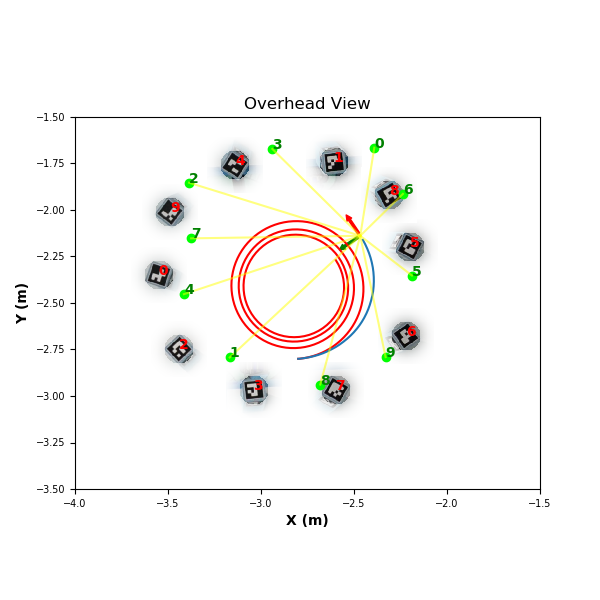

Box(children=(IntSlider(value=0, description='Frame: ', layout=Layout(flex='3 1 0%', width='auto'), max=299), …

In [2]:
#Import all the nessesary modules
import sys
!{sys.executable} -m pip install import_ipynb


%matplotlib notebook
import matplotlib.pyplot as plt
import import_ipynb
import math
import numpy as np
import pickle
#widgest allows interactive elements 
from ipywidgets import *
#Here we import from a python file support functions to visualize our robot
from importlib import import_module
#Visualizer
from Renderer import *
#Here we import Robot class definition form the other notebook
from EKF_Robot import *
#Here we import a class that defines out measurments
from Measurements import *

#Here we load our data including the true state 
with open('data/data_ekf.dat', "rb") as f:
    data = pickle.load(f)
    
gt_state = data['state']
control = data['control']
measurements = data['measurement']

#Create a robot and place it at the true starting position and orientation 
bot = EKF_Robot(0.14, 0.01)
#Place the robot at -2.8,-2.8 which is bottom middle of our arena
bot.state = gt_state[0,:].copy().reshape(-1,1)

#Apply our control to the robot and visualize
#Our timestamp is always 0.2
dt = 0.2
#Here we will save our state variable 
state = np.zeros((control.shape[0],3))


for c in range(control.shape[0]):
    state[c,:] = bot.state[:,0]
    drive_signal = DriveMeasurement(control[c,0],control[c,1],dt)
    bot.drive(drive_signal)

#Create a visualizer and visualize our atate
rend = Rendered.Instance()
rend.initialize(state,measurements,gt_state = gt_state)

# Now run EKF

importing Jupyter notebook from EKF.ipynb


<IPython.core.display.Javascript object>


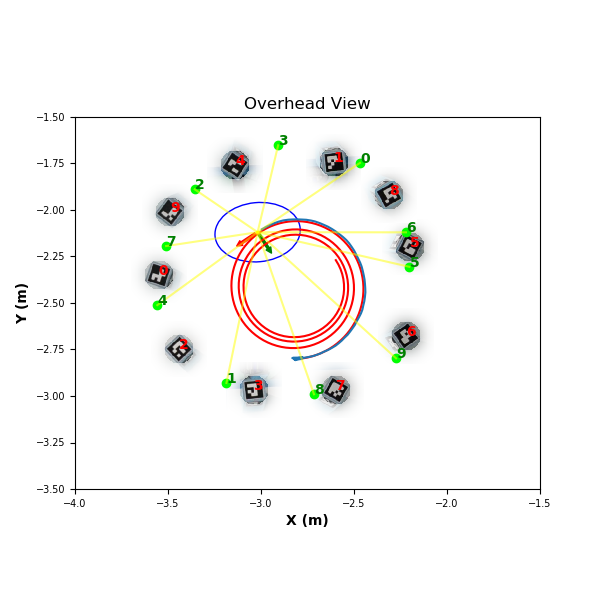

Box(children=(IntSlider(value=0, description='Frame: ', layout=Layout(flex='3 1 0%', width='auto'), max=299), …

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import import_ipynb
import math
import numpy as np
import pickle
#widgest allows interactive elements 
from ipywidgets import *
#Here we import from a python file support functions to visualize our robot
from importlib import import_module
#Visualizer
from Renderer import *
#Here we import Robot class definition form the other notebook
from EKF_Robot import *
#Here we import a class that defines out measurments
from Measurements import *
import EKF

#Here we load our data including the true state 
with open('data/data_ekf.dat', "rb") as f:
    data = pickle.load(f)
    
gt_state = data['state']
control = data['control']
measurements = data['measurement']


#Here are our true marker positions
markers = data['markers']
#Now lets see how well slam does
#Create a robot and place it at the true starting position and orientation 
bot = EKF_Robot(0.15, 0.01)
#Place the robot at -2.8,-2.8 which is bottom middle of our arena
bot.state = gt_state[0,:].copy().reshape(-1,1)

ekf = EKF.RobotEKF(bot,markers)
#Initial incertainty of our robot
ekf.P = np.eye(3)*100
#Uncertainty in our left and right wheel motors
sigma_drive = np.array([10,10])
#Uncertainty in measurement
sigma_measure = np.eye(2)*100

#Apply our control to the robot and visualize
#Our timestamp is always 0.2
dt = 0.2
#Here we will save our state variable 
state = np.zeros((control.shape[0],3))
#Here we save the robot covariances
robot_cov = np.zeros(((control.shape[0],3,3)))

for c in range(control.shape[0]):
    #Set the measurement covariances
    for mes in measurements[c]:
        mes.covariance = sigma_measure 
    drive_signal = DriveMeasurement(control[c,0],control[c,1],dt,sigma_drive[0],sigma_drive[1])
    ekf.predict(drive_signal)
    ekf.update(measurements[c])
    state[c,:] = bot.state[:,0]
    #drive_signal = DriveMeasurement(control[c,0],control[c,1],dt,sigma_drive[0],sigma_drive[1])
    # Drive and predict
    robot_cov[c,:,:] = ekf.P[0:3,0:3]
    
#Create a visualizer and visualize our state
rend = Rendered.Instance()
rend.initialize(state,measurements,gt_state = gt_state,robot_cov=robot_cov)



In [ ]:
state[296,:]